# Hidden Markov Model

The hidden markov model is a **pobabilistic relationship between a sequence of observations and a sequence of hidden states**. 

The relationship between observations and the hidden states is modeled using a **probability distribution**. 

There are two probabilities:
    -The **transition probabilities** describe the probability of *transitioning* from one hidden state to another
    -The **emission probabilities** describe the probability of observing an output given a hidden state

Hidden Markov Model  Algorithm
The Hidden Markov Model (HMM) algorithm can be implemented using the following steps:

*Step 1:* Define the state space and observation space: The state space is the set of all possible hidden states, and the observation space is the set of all possible observations.

*Step 2:* Define the initial state distribution: This is the probability distribution over the initial state.

*Step 3:* Define the state transition probabilities: These are the probabilities of transitioning from one state to another. This forms the transition matrix, which describes the probability of moving from one state to another.

*Step 4:* Define the observation likelihoods: These are the probabilities of generating each observation from each state. This forms the emission matrix, which describes the probability of generating each observation from each state.

*Step 5:* Train the model: The parameters of the state transition probabilities and the observation likelihoods are estimated using the Baum-Welch algorithm, or the forward-backward algorithm. This is done by iteratively updating the parameters until convergence.

*Step 6:* Decode the most likely sequence of hidden states: Given the observed data, the Viterbi algorithm is used to compute the most likely sequence of hidden states. This can be used to predict future observations, classify sequences, or detect patterns in sequential data.

*Step 7:* Evaluate the model: The performance of the HMM can be evaluated using various metrics, such as accuracy, precision, recall, or F1 score.

**Summary** - The HMM algorithm involves defining the state space, observation space and the parameters of the state trsnsition probabilities and observation likelihoods, training the model using the Baum-Welch algorithm or the forward-backward algorithm, decoding the most likely spequence of hiden states using the Viterbi algorithm, and evaluting the performance of the model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from hmmlearn import hmm

In [8]:
#Define the model parameters
#State space is a list of possible weather condition
states = ["Sunny","Rainy"]
n_states = len(states)
print(f"Number of hidden states: {n_states}")

#The observation space is defined as observations which is a list of two possible observations
observations = ["Dry","Wet"]
n_observations = len(observations)
print(f"Number of observations: {n_observations}")

Number of hidden states: 2
Number of observations: 2


In [9]:
#The State, transition and emission probabilities are defined as numpy arrays. 
#The state probabilities are the starting probability of each state
state_probability = np.array([0.6,0.4])
print('State probability: ',state_probability)

#The transition probabilities represent the probability of transitioning from one hidden state to another
transition_probability = np.array([[0.7, 0.3],
                                   [0.3, 0.7]])
print("\nTransition probability:\n", transition_probability)

#The emission probability represents the probability of observing each of rhe outputs given a hidden state
emission_probability= np.array([[0.9, 0.1],
                                 [0.2, 0.8]])
print("\nEmission probability:\n", emission_probability)

State probability:  [0.6 0.4]

Transition probability:
 [[0.7 0.3]
 [0.3 0.7]]

Emission probability:
 [[0.9 0.1]
 [0.2 0.8]]


In [11]:
#Create an instane of the HMM model and set the model parameters

model = hmm.CategoricalHMM(n_components=n_states) 
model.startprob_ = state_probability
model.transmat_= transition_probability
model.emissionprob_ = emission_probability

In [12]:
#Define an observation sequence

observations_sequence = np.array([0, 1, 0, 1, 0, 0]).reshape(-1, 1)
observations_sequence

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0]])

In [13]:
#Predict the modt likely sequence of hidden states

hidden_states = model.predict(observations_sequence)
print('Most likely hidden states: ',hidden_states)

Most likely hidden states:  [0 1 1 1 0 0]


In [15]:
#Decoding the observation sequence
#The Vetirbi algorithm is used to calculate the most likely sequence of hidden states that generated the observations using the decode method of the model.
#The model returns the log probability of the most likely sequence of hidden states and the sequence of hidden states itself

log_prob, hidden_states = model.decode(observations_sequence,lengths=len(observations_sequence),algorithm='viterbi')

print('Log Probability :',log_prob)
print("Most likely hidden states:", hidden_states)

Log Probability : -6.360602626270058
Most likely hidden states: [0 1 1 1 0 0]


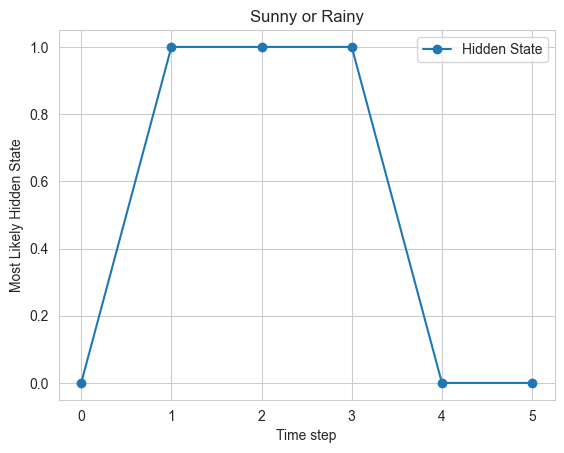

In [17]:
#Plot the results

sns.set_style("whitegrid")
plt.plot(hidden_states, '-o', label="Hidden State")
plt.xlabel('Time step')
plt.ylabel('Most Likely Hidden State')
plt.title("Sunny or Rainy")
plt.legend()
plt.show()

#The plot shows that the model predicts that the weather is mostly sunny, with a few rainy days mixed in.

# Speech recognition example using HMM

## Problem statement: Given a dataset of audio recordings, the task is to recognize the words spoken in the recordings.

In this example, the state space is defined as states, which is a list of 4 possible states representing silence or the presence of one of 3 different words. The observation space is defined as observations, which is a list of 2 possible observations, representing the volume of the speech. The initial state distribution is defined as start_probability, which is an array of probabilities of length 4 representing the probability of each state being the initial state.

The state transition probabilities are defined as transition_probability, which is a 4x4 matrix representing the probability of transitioning from one state to another. The observation likelihoods are defined as emission_probability, which is a 4x2 matrix representing the probability of emitting an observation for each state.

The model is defined using the MultinomialHMM class from hmmlearn library and is fit using the startprob_, transmat_, and emissionprob_ attributes. The sequence of observations is defined as observations_sequence and is an array of length 8, representing the volume of the speech in 8 different time steps.

The predict method of the model object is used to predict the most likely hidden states, given the observations. The result is stored in the hidden_states variable, which is an array of length 8, representing the most likely state for each time step.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from hmmlearn import hmm


states = ["Silence", "Word1", "Word2", "Word3"]
n_states = len(states)

observations = ["Loud", "Soft"]
n_observations = len(observations)

In [19]:
start_probability = np.array([0.8, 0.1, 0.1, 0.0])

transition_probability = np.array([[0.7, 0.2, 0.1, 0.0],
                                    [0.0, 0.6, 0.4, 0.0],
                                    [0.0, 0.0, 0.6, 0.4],
                                    [0.0, 0.0, 0.0, 1.0]])

emission_probability = np.array([[0.7, 0.3],
                                  [0.4, 0.6],
                                  [0.6, 0.4],
                                  [0.3, 0.7]])

In [20]:
model = hmm.CategoricalHMM(n_components=n_states)
model.startprob_ = start_probability
model.transmat_ = transition_probability
model.emissionprob_ = emission_probability

In [21]:
observations_sequence = np.array([0, 1, 0, 0, 1, 1, 0, 1]).reshape(-1, 1)

In [ ]:
hidden_states = model.predict(observations_sequence)
print("Most likely hidden states:", hidden_states)

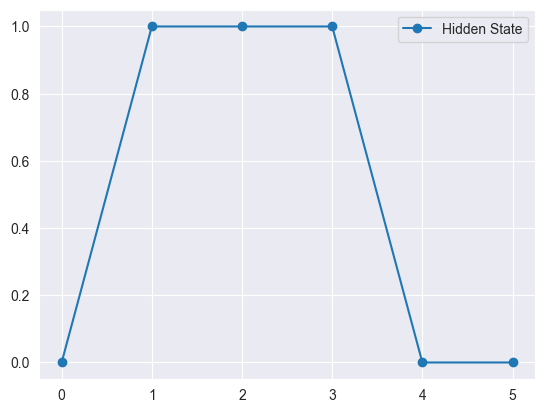

In [22]:
sns.set_style("darkgrid")
plt.plot(hidden_states, '-o', label="Hidden State")
plt.legend()
plt.show()

#